In [73]:
import numpy as np
import pandas as pd

In [74]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [75]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [76]:
df.shape

(5572, 5)

STEPS
1.data cleaning
2.EDA
3.text pre processing
4.model building
5.evaluation
6.improvement

# DATA CLEANING

In [77]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [79]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [80]:
df.sample(5)

,v1,v2
1628,ham,Yes princess! I want to make you happy...
5154,ham,"Like &lt;#&gt; , same question"
5272,ham,Hello.How u doing?What u been up 2?When will u...
3317,ham,I'm freezing and craving ice. Fml
1716,ham,Sorry about earlier. Putting out fires.Are you...


In [81]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2456,ham,Onum ela pa. Normal than.
68,spam,"Did you hear about the new \Divorce Barbie\""? ..."
2777,ham,Kind of. Took it to garage. Centre part of exh...
50,ham,What you thinked about me. First time you saw ...
2730,ham,I havent lei.. Next mon can?


In [82]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [83]:
df['target'] = encoder.fit_transform(df['target'])
#here ham is 0, spam is 1

In [84]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [85]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [86]:
#check for duplicated values
df.duplicated().sum()

403

In [87]:
#removing duplicates

In [88]:
df = df.drop_duplicates(keep='first')

In [89]:
df.duplicated().sum()

0

In [90]:
df.shape

(5169, 2)

# EDA

In [91]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [92]:

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

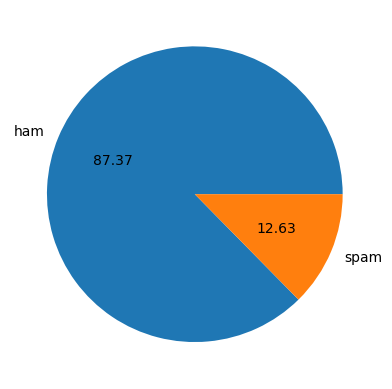

In [93]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

#conclusion ==>> data is imbalenced

In [94]:
import nltk

In [95]:
#number of charecters
df['num_charecters']=df['text'].apply(len)

In [96]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [97]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [98]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [99]:
df.head()

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [100]:
df[['num_words','num_sentences','num_charecters']].describe()

,num_words,num_sentences,num_charecters
count,5169.000000,5169.000000,5169.000000
mean,18.455794,1.965564,78.977945
std,13.324758,1.448541,58.236293
min,1.000000,1.000000,2.000000
25%,9.000000,1.000000,36.000000
50%,15.000000,1.000000,60.000000
75%,26.000000,2.000000,117.000000
max,220.000000,38.000000,910.000000


In [101]:
df[df['target']==0][['num_words','num_sentences','num_charecters']].describe()
#ham

,num_words,num_sentences,num_charecters
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [102]:
df[df['target']==1][['num_words','num_sentences','num_charecters']].describe()
#spam

,num_words,num_sentences,num_charecters
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


In [103]:
import seaborn as sns

<Axes: xlabel='num_charecters', ylabel='Count'>

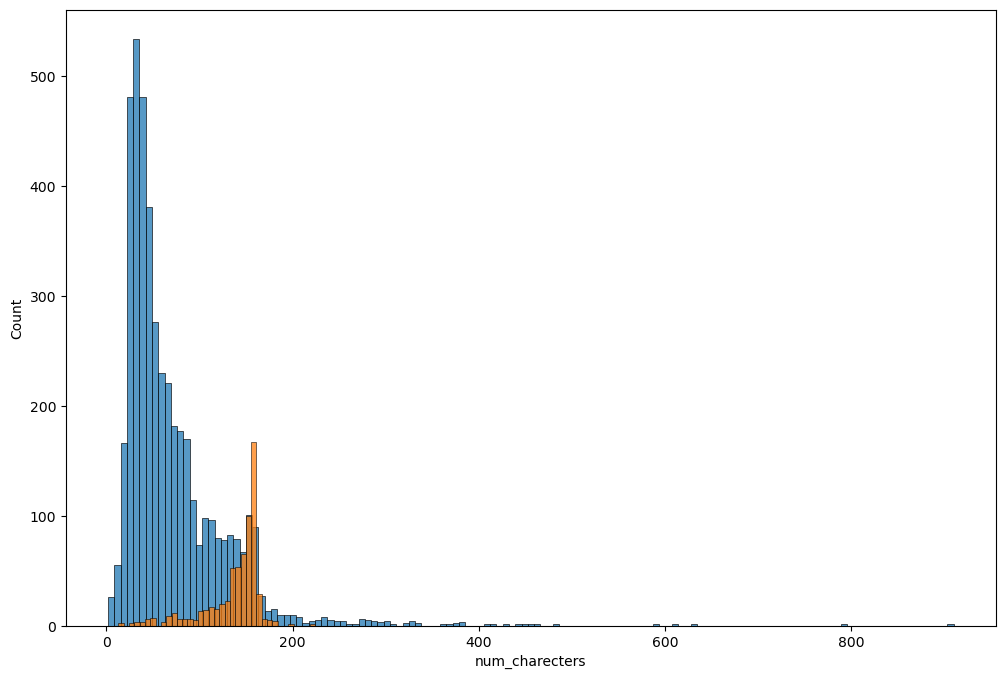

In [104]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'])

<Axes: xlabel='num_words', ylabel='Count'>

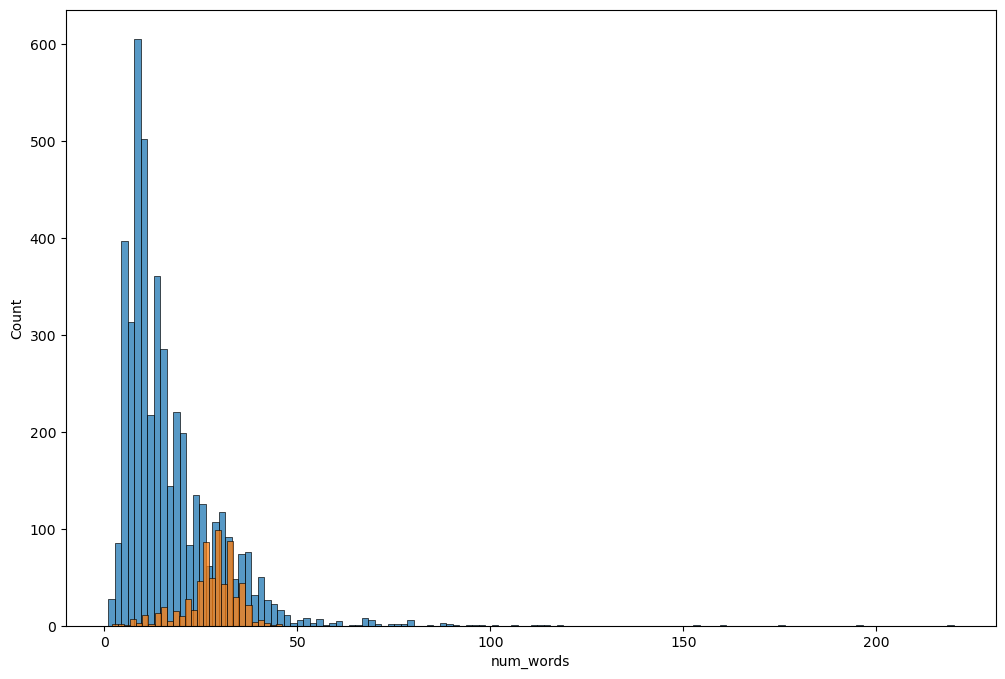

In [105]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])


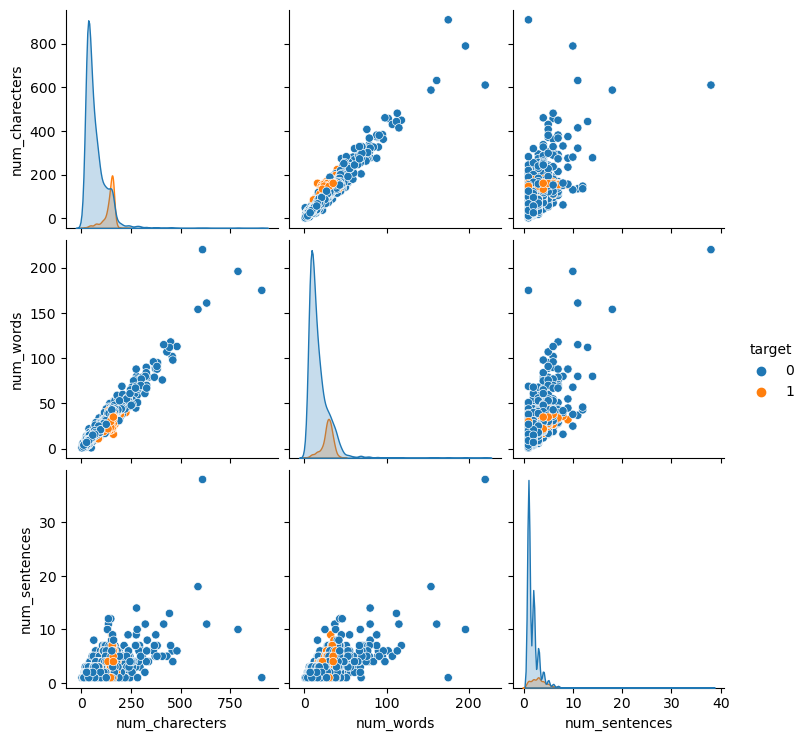

In [106]:
sns.pairplot(df,hue='target')

C:\Users\ruhan\AppData\Local\Temp\ipykernel_14156\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

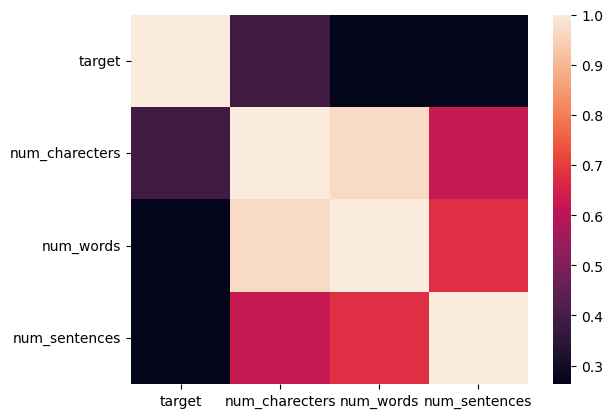

In [107]:
sns.heatmap(df.corr())

DATA PREPROCESSING
1.Lower case
2.Tokenize
3.Remove special characters
4.Remove stopwords and punctuation
5.stemming

In [108]:
from nltk.corpus import stopwords

In [109]:
import string

In [110]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = PorterStemmer()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [111]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [112]:
df["transform_text"]=df['text'].apply(transform_text)

In [113]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [114]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10)

In [115]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

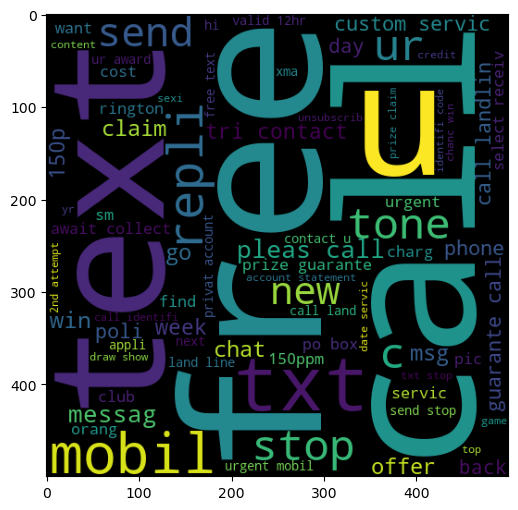

In [116]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [117]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

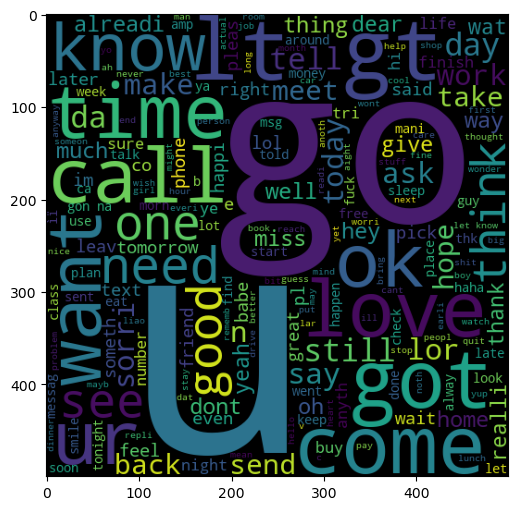

In [118]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [119]:
'''spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)'''

"spam_corpus=[]\nfor msg in df[df['target']==1]['transform_text'].tolist():\n    for word in msg.split():\n        spam_corpus.append(word)"

In [120]:
'''len(spam_corpus)
df.head()'''

'len(spam_corpus)\ndf.head()'

In [121]:
'''import pandas as pd
import seaborn as sns
from collections import Counter

# Assuming you have 'spam_corpus' defined
counter_result = Counter(spam_corpus).most_common(30)
df = pd.DataFrame(counter_result, columns=['Word', 'Frequency'])

# Now, use df to create the barplot
sns.barplot(x='Word', y='Frequency', data=df)
plt.xticks(rotation='vertical')
plt.show()'''

"import pandas as pd\nimport seaborn as sns\nfrom collections import Counter\n\n# Assuming you have 'spam_corpus' defined\ncounter_result = Counter(spam_corpus).most_common(30)\ndf = pd.DataFrame(counter_result, columns=['Word', 'Frequency'])\n\n# Now, use df to create the barplot\nsns.barplot(x='Word', y='Frequency', data=df)\nplt.xticks(rotation='vertical')\nplt.show()"

MODEL BUILDING

In [122]:
df

,target,text,num_charecters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [123]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv =CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [124]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [125]:
X.shape

(5169, 3000)

In [126]:
Y=df['target'].values

In [127]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [130]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [131]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [132]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [133]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [134]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [135]:
#tfidf -> mnb

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [137]:
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [138]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [139]:
print("h")

h


In [140]:
from sklearn.ensemble import StackingClassifier

In [141]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [143]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [144]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))